#  hiclass - k-evolution comparison

## Loading libraries

In [35]:
import numpy as np
import matplotlib

import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
import h5py
from mayavi import mlab

# from readgadget import *
# from pygadgetreader import *
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

NUM_COLORS = 20
from matplotlib.colors import LogNorm

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

from scipy.interpolate import interp1d

text_size=26
fig_size_x=24
fig_size_y=14

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    

## Hubble comparison

In [36]:
# As=2.215*1.e-9;
# h=0.67556;
# kp=0.05/h; 
# ns=0.9619;
# cs2_e3=1.e-7;
# c=2.99792458*1.e5; #Km/s
# Boxsize=300.;
# # c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=0.11117550483538947#np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
# # we obtain 0.11 from gevolution!

# # H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# # print("H0[1/Mpc]=100h/c: ",H0);
# w=-0.9;
# # print("H0[1/Mpc]=100h/c: ",H0);
# def Hubble_conf_Mpc(a):
#     c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
#     Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
#     Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
#     Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
#     return H0_conf_Gev*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))
# Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
# Omega_m=Omega_b + Omega_cdm;

### Loading BG files

In [37]:
direct = "./../output/"
bg = np.loadtxt(direct+"/file__background.dat")
class_bg = np.loadtxt("./../../hi_class_pub_devel/output/kessence_power00_background.dat")


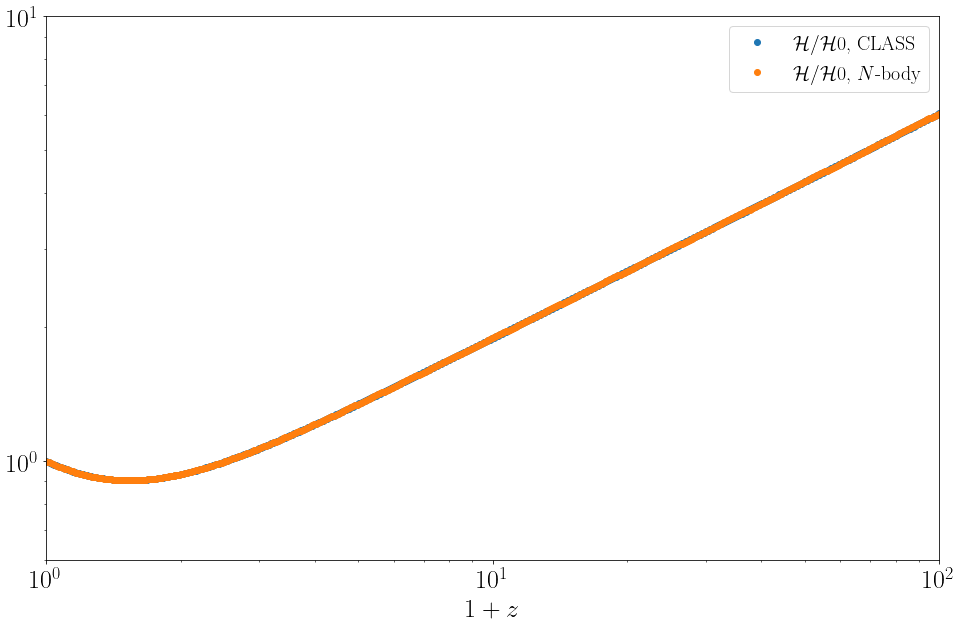

In [38]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# H0 = class_file[-1:,3]
a = 1./(1+class_bg[:,0])
plt.plot(1+class_bg[:,0],class_bg[:,3]*a/class_bg[-1:,3],"o",label=r"$\mathcal H/\mathcal H0$, CLASS")
# plt.plot(1+class_file[:,0],class_file[:,30],"o",label=r"CLASS, $\varphi''$")


plt.plot(1./(bg[:,2]), bg[:,3],"o",label=r"$\mathcal H /\mathcal H0$, $N$-body")


# plt.ylabel(r"$c_s^2$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 100 )
plt.ylim(0.6, 1.e1)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



# k-essence properties comparison

## Loading files

In [47]:
direct = "./../output/"
snap_info = np.loadtxt(direct+"/snapshots.txt")

avg_file = np.loadtxt(direct+"/Result_avg.txt")
class_file = np.loadtxt("./../../hi_class_pub_devel/output/kessence_power00_background.dat")


## $\phi$ and $\phi'$ test

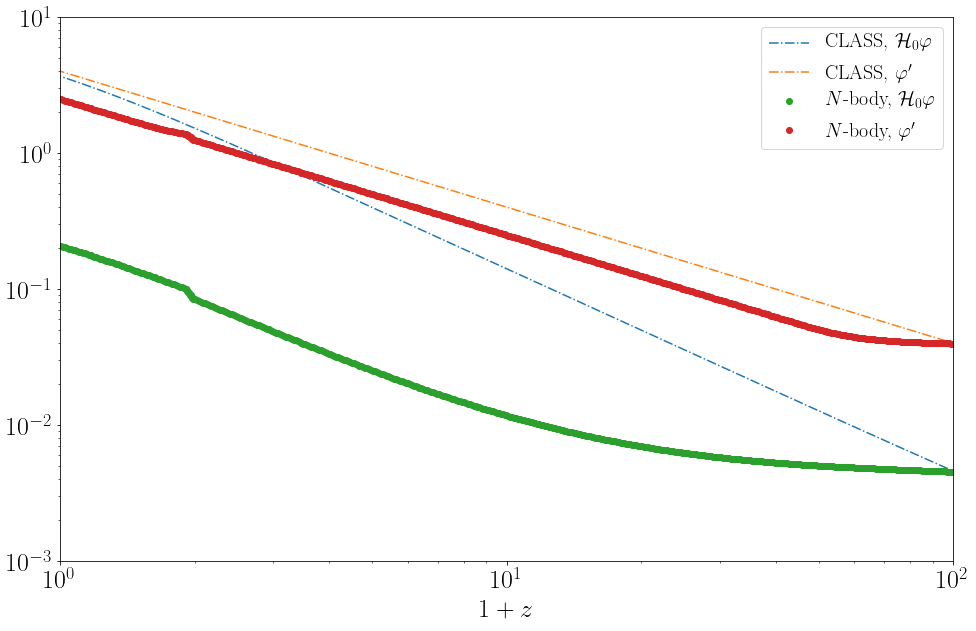

In [41]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

H0 = class_file[-1:,3]
plt.plot(1+class_file[:,0],class_file[:,28] * H0,"-.",label=r"CLASS, $\mathcal{H}_0 \varphi$")
plt.plot(1+class_file[:,0],class_file[:,29],"-.",label=r"CLASS, $\varphi'$")
# plt.plot(1+class_file[:,0],class_file[:,30],"o",label=r"CLASS, $\varphi''$")


plt.plot(1+avg_file[:,0],avg_file[:,1],"o",label=r"$N$-body, $\mathcal{H}_0 \varphi$")
plt.plot(1+avg_file[:,0],avg_file[:,2],"o",label=r"$N$-body, $\varphi'$")


# plt.ylabel(r"$c_s^2$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 100 )
plt.ylim(1.e-3, 1.e1)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## Convergence test

In [45]:
direct = "./../output/"
snap_info = np.loadtxt(direct+"/snapshots.txt")

avg_file_dtau_0d01 = np.loadtxt("./../data_convergence/Result_avg_dtau_0d01.txt")
avg_file_dtau_0d02 = np.loadtxt("./../data_convergence/Result_avg_dtau_0d02.txt")
avg_file_dtau_0d04 = np.loadtxt("./../data_convergence/Result_avg_dtau_0d04.txt")
avg_file_dtau_0d005 = np.loadtxt("./../data_convergence/Result_avg_dtau_0d005.txt")

class_file = np.loadtxt("./../../hi_class_pub_devel/output/kessence_power00_background.dat")

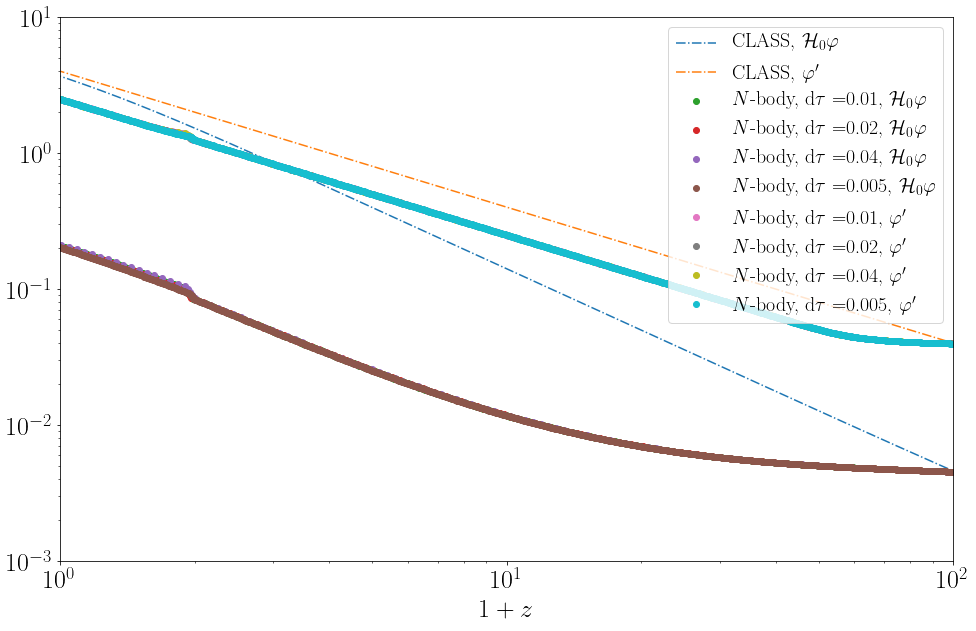

In [46]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

H0 = class_file[-1:,3]
plt.plot(1+class_file[:,0],class_file[:,28] * H0,"-.",label=r"CLASS, $\mathcal{H}_0 \varphi$")
plt.plot(1+class_file[:,0],class_file[:,29],"-.",label=r"CLASS, $\varphi'$")
# plt.plot(1+class_file[:,0],class_file[:,30],"o",label=r"CLASS, $\varphi''$")


plt.plot(1+avg_file_dtau_0d01[:,0],avg_file_dtau_0d01[:,1],"o",label=r"$N$-body, d$\tau=$0.01, $\mathcal{H}_0 \varphi$")
plt.plot(1+avg_file_dtau_0d02[:,0],avg_file_dtau_0d02[:,1],"o",label=r"$N$-body, d$\tau=$0.02, $\mathcal{H}_0 \varphi$")
plt.plot(1+avg_file_dtau_0d04[:,0],avg_file_dtau_0d04[:,1],"o",label=r"$N$-body, d$\tau=$0.04, $\mathcal{H}_0 \varphi$")
plt.plot(1+avg_file_dtau_0d005[:,0],avg_file_dtau_0d005[:,1],"o",label=r"$N$-body, d$\tau=$0.005, $\mathcal{H}_0 \varphi$")

plt.plot(1+avg_file_dtau_0d01[:,0],avg_file_dtau_0d01[:,2],"o",label=r"$N$-body, d$\tau=$0.01, $\varphi'$")
plt.plot(1+avg_file_dtau_0d02[:,0],avg_file_dtau_0d02[:,2],"o",label=r"$N$-body, d$\tau=$0.02, $\varphi'$")
plt.plot(1+avg_file_dtau_0d04[:,0],avg_file_dtau_0d04[:,2],"o",label=r"$N$-body, d$\tau=$0.04, $\varphi'$")
plt.plot(1+avg_file_dtau_0d005[:,0],avg_file_dtau_0d005[:,2],"o",label=r"$N$-body, d$\tau=$0.005, $\varphi'$")


# plt.ylabel(r"$c_s^2$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 100 )
plt.ylim(1.e-3, 1.e1)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



##  $c_s^2$ test

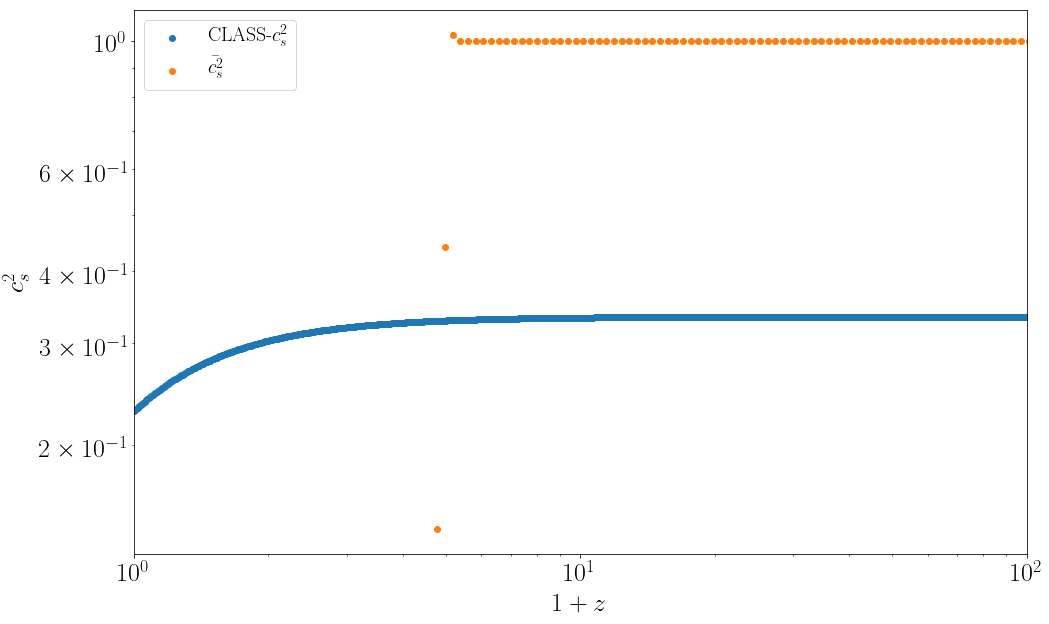

In [114]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)


plt.plot(1+class_file[:,0],class_file[:,26],"o",label=r"CLASS-$c_s^2$")
plt.plot(1+avg_file[:,0],avg_file[:,5],"o",label=r"$\bar{c_s^2}$")


plt.ylabel(r"$c_s^2$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 100 )
# plt.ylim(1.e-2, 2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## Some tests

In [48]:
phi_smg = interp1d(class_file[:,0], class_file[:,28])
phi_prime = interp1d(class_file[:,0], class_file[:,29])

H_class = interp1d(class_file[:,0], class_file[:,3])
cs2 = interp1d(class_file[:,0], class_file[:,26])
p = interp1d(class_file[:,0], class_file[:,19])
rho = interp1d(class_file[:,0], class_file[:,18])

rho_cdm = interp1d(class_file[:,0], class_file[:,10])
rho_b = interp1d(class_file[:,0], class_file[:,9])

rho_crt = interp1d(class_file[:,0], class_file[:,12])
alpha_k = interp1d(class_file[:,0], class_file[:,22])

phi_gev = interp1d(avg_file[:,0],avg_file[:,1])
phi_prime_gev = interp1d(avg_file[:,0],avg_file[:,2])

# a(100)
# cs2(100)
# Boxsize = 500;
# c=2.99792458*1.e5; #Km/s
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1

# Initial values for phi_smg and phi_smg'

In [50]:
print("hiclass, z=100: ",phi_smg(100.0)* H0,phi_prime(100.0))
print("hiclass, z=90: ",phi_smg(90.0)* H0,phi_prime(90.0))
print("hiclass, z=10: ",phi_smg(10.0)* H0,phi_prime(10.0))
print("hiclass, z=0: ",phi_smg(0.0)* H0,phi_prime(0.0))


print(" gev: z=100",phi_gev(100),phi_prime_gev(100))
print("gev: z=90",phi_gev(90.),phi_prime_gev(90.))
print("gev: z=10",phi_gev(10.),phi_prime_gev(10.))
print("gev: z=0",phi_gev(0),phi_prime_gev(0))


('hiclass, z=100: ', array([ 0.00451695]), array(0.03960485908790306))
('hiclass, z=90: ', array([ 0.00525347]), array(0.04395695258194529))
('hiclass, z=10: ', array([ 0.12226659]), array(0.3636372307636966))
('hiclass, z=0: ', array([ 3.67315676]), array(4.000000000052))
(' gev: z=100', array(0.00451688), array(0.039621))
('gev: z=90', array(0.004575400889523391), array(0.04002031825170218))
('gev: z=10', array(0.010726074977168949), array(0.22674614611872146))
('gev: z=0', array(0.20177239302875022), array(2.493840068203949))


# Power spectra

In [172]:
data = nested_dict(5, list)
redshift = [100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]

direct = "./../output/"
direc_hi = "./../../hi_class_pub_devel/output/"
for i in range(np.shape(redshift)[0]):
    
    data["pk"]["m"]["z="+str(redshift[i])] = np.loadtxt(direct+"/file_pk_"+str(i).zfill(3)+"_delta.dat")
    data["pk"]["pi_k"]["z="+str(redshift[i])] = np.loadtxt(direct+"/file_pk_"+str(i).zfill(3)+"_pi_k.dat")
    data["pk"]["zeta"]["z="+str(redshift[i])] = np.loadtxt(direct+"/file_pk_"+str(i).zfill(3)+"_zeta.dat")
    
    data["class"]["tk"]["z="+str(redshift[i])] = np.loadtxt(direc_hi+"/kessence_power00_z"+str(i+1)+"_tk.dat")
    data["class"]["pm"]["z="+str(redshift[i])] = np.loadtxt(direc_hi+"/kessence_power00_z"+str(i+1)+"_pk.dat")

# CLASS conversion :
k_pivot = 0.05
A_s = 2.1e-9
n_s = 0.96
h = 0.67
k_class = data["class"]["tk"]["z="+str(redshift[0])][:,0]


## $\varphi$ power

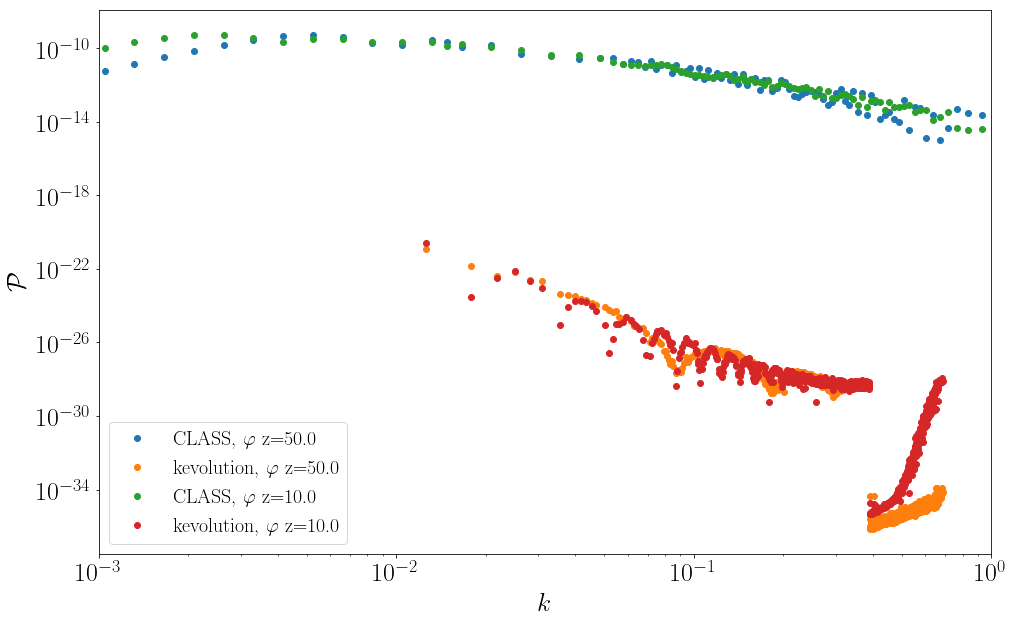

In [178]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)

for i in [50.0, 10.0 ]:
    k_class = data["class"]["tk"]["z="+str(i)][:,0]
    conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));
    tk = data["class"]["tk"]["z="+str(i)][:,5] * H_class(i)* 1./(1 + i) # vx_smg 
    pk_hiclass = tk**2 * conversion * k_class**3/(2.0 * np.pi**2) # What is computed in kev is Hconf * pi
    plt.plot(k_class,pk_hiclass ,"o",label=r"CLASS, $\varphi$"+" z="+str(i))
    
    kgev = data["pk"]["pi_k"]["z="+str(i)][:,0]
    pkgev = data["pk"]["pi_k"]["z="+str(i)][:,1]
    plt.plot(kgev,pkgev ,"o",label=r"kevolution, $\varphi$"+" z="+str(i))


plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k$")
plt.xlim(0.001, 1 )
# plt.ylim(1.e-4, 1.e-2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## $\varphi'$ power

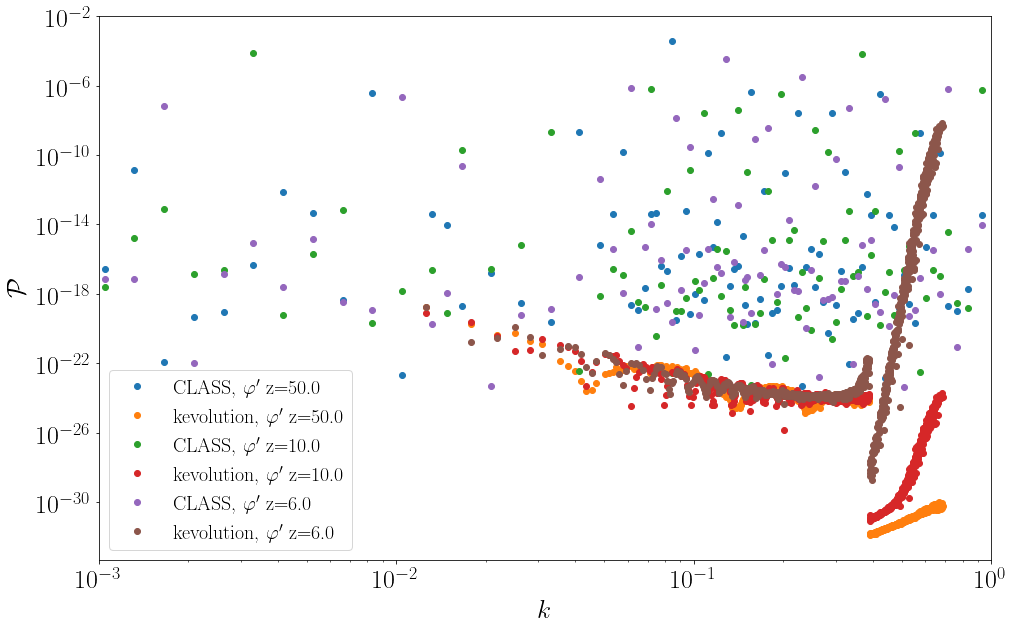

In [179]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)

for i in [50.0, 10.0, 6.0 ]:
    k_class = data["class"]["tk"]["z="+str(i)][:,0]
    conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));
    tk = data["class"]["tk"]["z="+str(i)][:,6] # vx_smg 
    pk_hiclass = tk**2 * conversion * k_class**3/(2.0 * np.pi**2) # What is computed in kev is Hconf * pi
    plt.plot(k_class,pk_hiclass ,"o",label=r"CLASS, $\varphi'$"+" z="+str(i))
    
    kgev = data["pk"]["zeta"]["z="+str(i)][:,0]
    pkgev = data["pk"]["zeta"]["z="+str(i)][:,1]
    plt.plot(kgev,pkgev ,"o",label=r"kevolution, $\varphi'$"+" z="+str(i))


plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k$")
plt.xlim(0.001, 1 )
# plt.ylim(1.e-4, 1.e-2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## Matter power

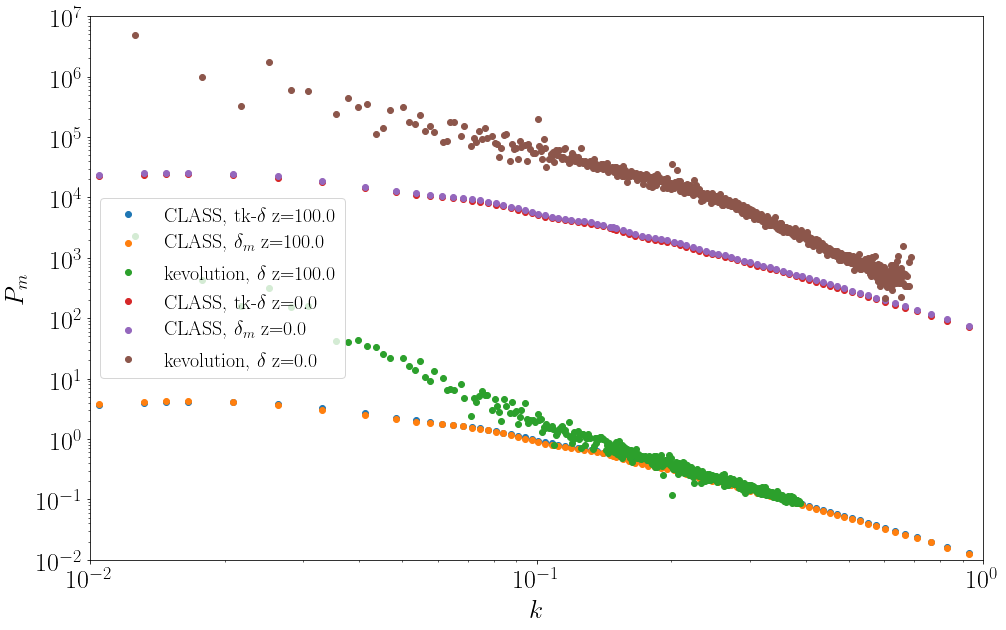

In [188]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)

for i in [100.0,0.0]:
    k_class = data["class"]["tk"]["z="+str(i)][:,0]
    conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));
    tk_cdm = data["class"]["tk"]["z="+str(i)][:,3] # cdm
    tk_b = data["class"]["tk"]["z="+str(i)][:,3] # b
    rho_m = rho_cdm(i)+rho_b(i)
    tk = (rho_cdm(i)/rho_m) * tk_cdm + (rho_b(i)/rho_m) * tk_b 
    pk_hiclass = tk**2 * conversion 
    plt.plot(k_class, pk_hiclass ,"o",label=r"CLASS, tk-$\delta$"+" z="+str(i))
    #########################
    pkm_hiclass = data["class"]["pm"]["z="+str(i)][:,1]
    k_class = data["class"]["pm"]["z="+str(i)][:,0]
    plt.plot(k_class, pkm_hiclass ,"o",label=r"CLASS, $\delta_m$"+" z="+str(i))

    #########################
    kgev = data["pk"]["m"]["z="+str(i)][:,0]
    pkgev = data["pk"]["m"]["z="+str(i)][:,1]
    plt.plot(kgev,pkgev*(2.0 * np.pi**2)/kgev**3 ,"o",label=r"kevolution, $\delta$"+" z="+str(i))


plt.ylabel(r"${P}_m$")
plt.xlabel(r"$k$")
plt.xlim(0.01, 1 )
plt.ylim(1.e-2, 1.e7)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)

